!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install konlpy
!pip install wordcloud
!pip install gensim

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("최종합친호텔리뷰.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237450 entries, 0 to 237449
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   hotel               237450 non-null  object
 1   star                237450 non-null  int64 
 2   review              237450 non-null  object
 3   date                237450 non-null  object
 4   real_date           237450 non-null  object
 5   length              237450 non-null  int64 
 6   review_spell_check  237450 non-null  object
 7   site                237450 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 14.5+ MB


In [4]:
df.describe()

,star,length,site
count,237450.000000,237450.000000,237450.000000
mean,4.635641,57.506161,0.483799
std,0.744728,76.847789,0.499739
min,1.000000,1.000000,0.000000
25%,4.000000,11.000000,0.000000
50%,5.000000,23.000000,0.000000
75%,5.000000,66.000000,1.000000
max,5.000000,500.000000,1.000000


In [5]:
df.hotel.describe()

count       237450
unique         303
top       신라스테이 구로
freq          9261
Name: hotel, dtype: object

In [6]:
df.hotel.value_counts()

신라스테이 구로          9261
글래드 마포            7245
신라스테이 마포          6651
노보텔 앰배서더 서울 용산    5513
롯데시티호텔 명동         5138
                  ... 
메이원호텔                4
사월 호텔                3
마리호텔                 2
종로 호텔팝 리즈 프리미어       1
유에이치 스위트 더 서울        1
Name: hotel, Length: 303, dtype: int64

In [7]:
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 존재하지 않습니다


In [8]:
df = df.dropna()

In [8]:
val_count = df['star'].value_counts() # 유니크값의 개수를 확인합니다.
val_count

5    177447
4     42599
3     11020
2      3658
1      2726
Name: star, dtype: int64

In [9]:
import matplotlib.pyplot as plt # 그래프 그리기 위한 패키지
%matplotlib inline
plt.style.use("ggplot")

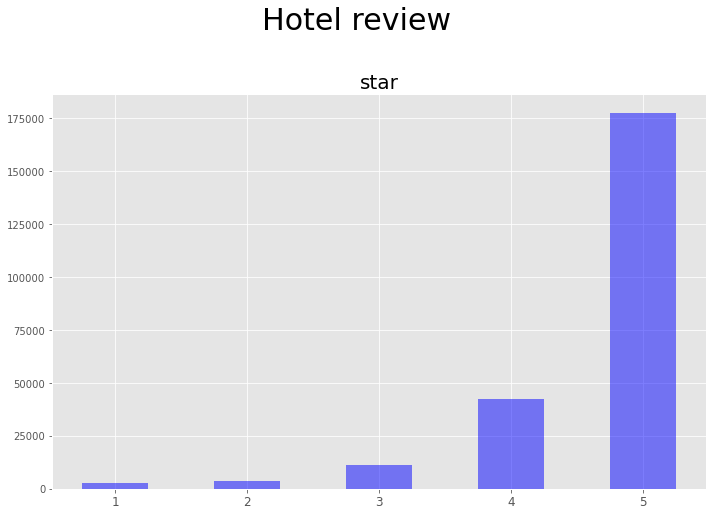

In [10]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = df['star']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Hotel review", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('star', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [ ]:
bad = df.loc[df.star<=3]
good = df.loc[df.star==5]
bad['label'] = 0
good['label']= 1

In [13]:
bad

,hotel,star,review,date,real_date,length,review_spell_check,site,label
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0,0
61,몬드리안 서울 이태원(Mondrian Seoul Itaewon),3,구냥 구렇네요,2022. 02. 28,2022. 02. 28,7,구냥 고렇네요,0,0
90,몬드리안 서울 이태원(Mondrian Seoul Itaewon),3,옆방이랑 같이 자는 느낌 양 옆방이랑 방음 진짜 아예 안되고 객실 내에서는 화장실 ...,2022. 01. 23,2022. 01. 23,57,옆방이랑 같이 자는 느낌 양 옆방이랑 방음 진짜 아예 안되고 객실 내에서는 화장실 ...,0,0
103,몬드리안 서울 이태원(Mondrian Seoul Itaewon),1,정말 가격 5성급에 비해 방도 너무 비좁습니다그리고 방음도 안되서 윗층의 발걸음 소...,2022. 01. 09,2022. 01. 09,125,정말 가격 5성급에 비해 방도 너무 비좁습니다 그리고 방음도 안돼서 위층의 발걸음 ...,0,0
120,몬드리안 서울 이태원(Mondrian Seoul Itaewon),1,비싼돈 내고 미리 예약했더니 당일 예약이 가격이 더 저렴함스페리어룸9층 부터 객실 ...,2021. 12. 28,2021. 12. 28,213,비싼 돈 내고 미리 예약했더니 당일 예약이 가격이 더 저렴함 스페리 어름 9층부터 ...,0,0
...,...,...,...,...,...,...,...,...,...
237284,뜨랑블루 호텔,3,1 외관상 청결함은 문제없음2 suv차량까지는 주차되는데 전화하니 안된다 된다 정확...,3년 전,3년 전,198,1 외관상 청결함은 문제없음 2 suv 차량까지는 주차되는데 전화하니 안된다 된다 ...,1,0
237309,뜨랑블루 호텔,3,창문에서 웃풍이 불어 춥고 새벽 사람들 소리때문에 시끄러웠습니다,3년 전,3년 전,36,창문에서 웃풍이 불어 춥고 새벽 사람들 소리 때문에 시끄러웠습니다,1,0
237315,뜨랑블루 호텔,3,가격대비 괜찮은거 같네요,3년 전,3년 전,13,가격 대비 괜찮은 거 같네요,1,0
237345,뜨랑블루 호텔,3,이번이 두번째 방문인데 손가락만한 바퀴벌레가 나왔어요전화하니까 방 변경해주셔서 옮겼...,3년 전,3년 전,118,이번이 두 번째 방문인데 손가락만 한 바퀴벌레가 나왔어요 전화하니까 방 변경해주셔서...,1,0


In [16]:
good

,hotel,star,review,date,real_date,length,review_spell_check,site,label
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳굳굳굳,0,1
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...,0,1
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예뻤어요,0,1
6,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,행복하고 즐거운시간이었습니다,4일 전,2022. 04. 01,15,행복하고 즐거운 시간이었습니다,0,1
7,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,너무 좋았어요 깨끗하고 좋은숙소였어요,4일 전,2022. 04. 01,20,너무 좋았어요 깨끗하고 좋은 숙소였어요,0,1
...,...,...,...,...,...,...,...,...,...
237443,뜨랑블루 호텔,5,방이 깨끗하고 넓고무엇보다 침구가 너무 편안해서숙박하기에 너무 좋은 호텔입니다분위도...,5년 전,5년 전,79,방이 깨끗하고 넓고 무엇보다 침구가 너무 편안해서 숙박하기에 너무 좋은 호텔입니다분...,1,1
237444,뜨랑블루 호텔,5,좋앗음,5년 전,5년 전,3,좋았음,1,1
237446,뜨랑블루 호텔,5,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1,1
237447,뜨랑블루 호텔,5,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1,1


In [19]:
postive = good.sample(18000, random_state = 7)

In [20]:
data= pd.concat([postive, bad])

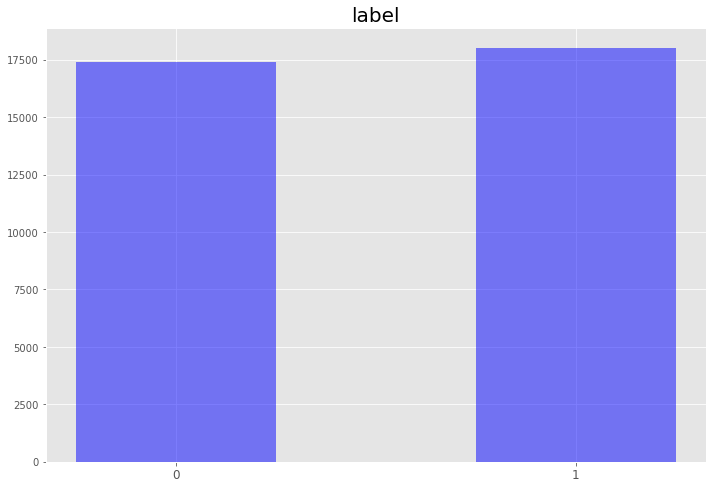

In [24]:
import matplotlib.pyplot as plt # 그래프 그리기 위한 패키지
%matplotlib inline
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = data['label']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.title('label', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [25]:
target = data.label
data = data.review_spell_check

In [26]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=777)

In [27]:
df_train = df.review_spell_check.copy()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import

vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(x_train) # countvectorizer 학습
X = vectorizer.transform(x_train) # transform

In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()
model.fit(X,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
#입력해서 확인하는 용도
#run model
X_pred = vectorizer.transform([input()]) 
y_pred = model.predict(X_pred)
print(y_pred)

직원이 불친절해요
[0]


In [38]:
y_test.astype('category')

103888    1
113351    1
242749    1
126743    0
153323    1
         ..
164832    1
52651     1
156726    0
214532    0
100775    1
Name: label, Length: 7909, dtype: category
Categories (2, int64): [0, 1]

In [42]:
#run model
X_pred = vectorizer.transform(x_test) 
y_pred = model.predict(X_pred)

In [43]:
model.score(X, y_train)

0.9335522366980898

In [51]:
model.score(X_pred, y_test)

0.8532693122440334

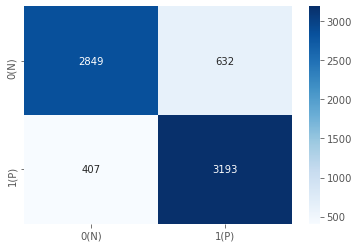

In [84]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()

In [72]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.82      0.85      3481\n           1       0.83      0.89      0.86      3600\n\n    accuracy                           0.85      7081\n   macro avg       0.85      0.85      0.85      7081\nweighted avg       0.85      0.85      0.85      7081\n'

In [81]:
print("accuracy:", model.score(X_pred, y_test))
print("precision:", precision_score(y_test,y_pred))
print("recall:", recall_score(y_test,y_pred))
print("f1_score:", f1_score(y_test,y_pred))

accuracy: 0.8532693122440334
precision: 0.8347712418300653
recall: 0.8869444444444444
f1_score: 0.8600673400673401


In [87]:
four = df.loc[df.star==4]

In [88]:
fxtest = four.review_spell_check

In [89]:
f_pred = vectorizer.transform(fxtest) 
fy_pred = model.predict(f_pred)

In [92]:
four['pred_label'] = fy_pred

<ipython-input-92-84ef34678ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four['pred_label'] = fy_pred


In [96]:
four.loc[four.pred_label == 0]

,hotel,star,review,date,real_date,length,review_spell_check,site,pred_label
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,0,0
24,몬드리안 서울 이태원(Mondrian Seoul Itaewon),4,방이 꽤 작음 화장실이 따로 없음,2022. 03. 22,2022. 03. 22,18,방이 꽤 작음 화장실이 따로 없음,0,0
66,몬드리안 서울 이태원(Mondrian Seoul Itaewon),4,체크인 오래 기다렸어요,2022. 02. 23,2022. 02. 23,12,체크인 오래 기다렸어요,0,0
83,몬드리안 서울 이태원(Mondrian Seoul Itaewon),4,체크인 30 분 넘게 걸림 데스크 직원 너무 적음 객실 은 절대 5성급 아님 ...,2022. 01. 31,2022. 01. 31,67,체크인 30 분 넘게 걸림 데스크 직원 너무 적음 객실 은 절대 5성급 아님 ...,0,0
108,몬드리안 서울 이태원(Mondrian Seoul Itaewon),4,방음이 조금 아쉬움 편의시설잘되어있음,2022. 01. 04,2022. 01. 04,20,방음이 조금 아쉬움 편의시설 잘 되어있음,0,0
...,...,...,...,...,...,...,...,...,...
237400,뜨랑블루 호텔,4,디럭스더블룸을 혼자 이용했습니다방 사이즈도 큰편이었고 침대는 부드럽고 폭신폭신전반적...,4년 전,4년 전,295,디럭스 더블룸을 혼자 이용했습니다 방 사이즈도 큰 편이었고 침대는 부드럽고 폭신폭신...,1,0
237402,뜨랑블루 호텔,4,욕조있다고 적혀있는데 없는 방도 있네요,4년 전,4년 전,21,욕조 있다고 적혀있는데 없는 방도 있네요,1,0
237424,뜨랑블루 호텔,4,직원분들은 매우 친절했습니다조식은 무료라 그럭저럭 잘 먹었어요세면대가 잘 안내려가요,4년 전,4년 전,46,직원분들은 매우 친절했습니다 조식은 무료라 그럭저럭 잘 먹었어요 세면대가 잘 안 내려가요,1,0
237427,뜨랑블루 호텔,4,가격에 비해 시설이 굉장히 좋아요 놔두고 온 물건이 있는데 바로 다 버리셔서 그게 ...,5년 전,5년 전,53,가격에 비해 시설이 굉장히 좋아요 놔두고 온 물건이 있는데 바로 다 버리셔서 그게 ...,1,0


In [99]:
four.loc[four.pred_label == 1]

,hotel,star,review,date,real_date,length,review_spell_check,site,pred_label
5,몬드리안 서울 이태원(Mondrian Seoul Itaewon),4,청결 위치 다 좋습니다 제가 목욕을 너무 좋아해 알고는 있었지만 욕조가 없는게 살짝...,4일 전,2022. 04. 01,65,청결 위치 다 좋습니다 제가 목욕을 너무 좋아해 알고는 있었지만 욕조가 없는 게 살...,0,1
10,몬드리안 서울 이태원(Mondrian Seoul Itaewon),4,편히 쉬다갔습니다,6일 전,2022. 04. 01,9,편히 쉬다 갔습니다,0,1
26,몬드리안 서울 이태원(Mondrian Seoul Itaewon),4,겁나 감각적인 호텔불타오르는 2030대 커플들이 즐비하지만 가뭄에 콩나듯 아이동반가...,2022. 03. 21,2022. 03. 21,65,겁나 감각적인 호텔 불타오르는 2030대 커플들이 즐비하지만 가뭄에 콩 나듯 아이 ...,0,1
31,몬드리안 서울 이태원(Mondrian Seoul Itaewon),4,호캉스 잘 보내다 갔습니다,2022. 03. 20,2022. 03. 20,14,호캉스 잘 보내다 갔습니다,0,1
44,몬드리안 서울 이태원(Mondrian Seoul Itaewon),4,시티뷰가 좋아요,2022. 03. 07,2022. 03. 07,8,시티 부가 좋아요,0,1
...,...,...,...,...,...,...,...,...,...
237413,뜨랑블루 호텔,4,추천합니다가성비 좋아요,4년 전,4년 전,12,추천합니다가 성비 좋아요,1,1
237418,뜨랑블루 호텔,4,자주 애용하는 곳이예요 아침에 조식도 제공해 주고 가격 대비 괜찮은 곳입니다,4년 전,4년 전,42,자주 애용하는 곳이에요 아침에 조식도 제공해 주고 가격 대비 괜찮은 곳입니다,1,1
237421,뜨랑블루 호텔,4,방 크고 깔끔다만 조명이 조금 어두움물을 4병이나 줘서 따로 안사도 괜찮음IPTV ...,4년 전,4년 전,69,방 크고 깔끔 다만 조명이 조금 어두움물을 4병이나 줘서 따로 안 사도 괜찮음 IP...,1,1
237436,뜨랑블루 호텔,4,객실 내에 욕조도 있고 도시에서 잠시 쉬어가기 좋은곳입니다,5년 전,5년 전,32,객실 내에 욕조도 있고 도시에서 잠시 쉬어가기 좋은 곳입니다,1,1


In [98]:
four.pred_label.value_counts()

1    25454
0    17145
Name: pred_label, dtype: int64

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
vect.fit(x_train) 
xtf = vectorizer.transform(x_train) # transform

model = LogisticRegression()
model.fit(xtf,y_train)

In [48]:
model.score(xtf, y_train)

0.9335522366980898

In [49]:
#run model
xtf_pred = vect.transform(x_test) 
y_tfp = model.predict(xtf_pred)

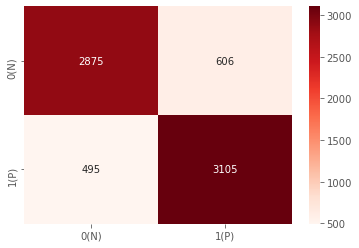

In [68]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
cm = confusion_matrix(y_test, y_tfp)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()

In [101]:
df_train

0                       발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요
1                                                     굳굳굳굳굳
2         생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...
3         오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...
4                                          객실이 깨끗하고 너무 예뻤어요
                                ...                        
237445    시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...
237446              깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다
237447                      괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요
237448    시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...
237449    일단 조식이 포함되어있어서 좋았고요 방도 깨끗하고 하루 정도 지내기엔 좋은 거 같네...
Name: review_spell_check, Length: 237450, dtype: object

In [102]:
#run model
df_vec= vectorizer.transform(df_train) 
all_pred = model.predict(df_vec)

In [104]:
df['sentiment'] = all_pred

In [105]:
df

,hotel,star,review,date,real_date,length,review_spell_check,site,sentiment
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,0,0
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳굳굳굳,0,1
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0,0
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...,0,1
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예뻤어요,0,1
...,...,...,...,...,...,...,...,...,...
237445,뜨랑블루 호텔,2,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1,0
237446,뜨랑블루 호텔,5,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1,1
237447,뜨랑블루 호텔,5,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1,1
237448,뜨랑블루 호텔,5,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1,1


In [107]:
proba = model.predict_proba(df_vec)

In [116]:
df_proba= pd.DataFrame(proba, columns=['부정', 'sent_proba'])

In [117]:
df_proba

,부정,sent_proba
0,0.842940,0.157060
1,0.309830,0.690170
2,0.831721,0.168279
3,0.119664,0.880336
4,0.192970,0.807030
...,...,...
237445,0.909685,0.090315
237446,0.003204,0.996796
237447,0.273036,0.726964
237448,0.384474,0.615526


In [118]:
df['sent_proba']=df_proba['sent_proba']

In [119]:
df.describe()

,star,length,site,sentiment,sent_proba
count,237450.000000,237450.000000,237450.000000,237450.000000,2.374500e+05
mean,4.635641,57.506161,0.483799,0.785172,7.022491e-01
std,0.744728,76.847789,0.499739,0.410704,3.023777e-01
min,1.000000,1.000000,0.000000,0.000000,1.531017e-18
25%,4.000000,11.000000,0.000000,1.000000,5.535977e-01
50%,5.000000,23.000000,0.000000,1.000000,8.077600e-01
75%,5.000000,66.000000,1.000000,1.000000,9.426238e-01
max,5.000000,500.000000,1.000000,1.000000,1.000000e+00


In [121]:
df

,hotel,star,review,date,real_date,length,review_spell_check,site,sentiment,sent_proba
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,0,0,0.157060
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳굳굳굳,0,1,0.690170
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0,0,0.168279
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...,0,1,0.880336
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예뻤어요,0,1,0.807030
...,...,...,...,...,...,...,...,...,...,...
237445,뜨랑블루 호텔,2,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1,0,0.090315
237446,뜨랑블루 호텔,5,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1,1,0.996796
237447,뜨랑블루 호텔,5,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1,1,0.726964
237448,뜨랑블루 호텔,5,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1,1,0.615526


In [120]:
df.to_csv("호텔감성분석확률.csv", index=False)

In [49]:
from gensim.models import Word2Vec

In [28]:
word_split = df['review_spell_check'].str.split()
word_split[:5]

0        [발레파킹, 비용이, 있긴, 했지만, 방도, 나름, 괜찮고, 조식도, 맛있었어요]
1                                              [굳굳굳굳굳]
2    [생각보다, 방이, 좁아서, 놀랐어요, 아무래도, 안마의자나, 고급, 블루투스, 스...
3    [오픈하고, 얼마, 안, 돼서, 갔었는데, 깔끔하고, 좋은, 호텔이었습니다, 오픈,...
4                                [객실이, 깨끗하고, 너무, 예뻤어요]
Name: review_spell_check, dtype: object

In [52]:
model = Word2Vec(sentences=word_split, window=5)

In [55]:
model.wv.most_similar("직원")

[('직원들', 0.858448326587677),
 ('직원의', 0.8572185635566711),
 ('직원은', 0.8517175912857056),
 ('직원이', 0.7935423851013184),
 ('직원분', 0.7895414233207703),
 ('남직원은', 0.7834699153900146),
 ('직원분의', 0.7728833556175232),
 ('여직원', 0.7673814296722412),
 ('직원들은', 0.7653464078903198),
 ('직원들의', 0.7554028034210205)]